## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [8]:
mean = df.mean()
var = df.var()
print(mean, var)

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64 AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

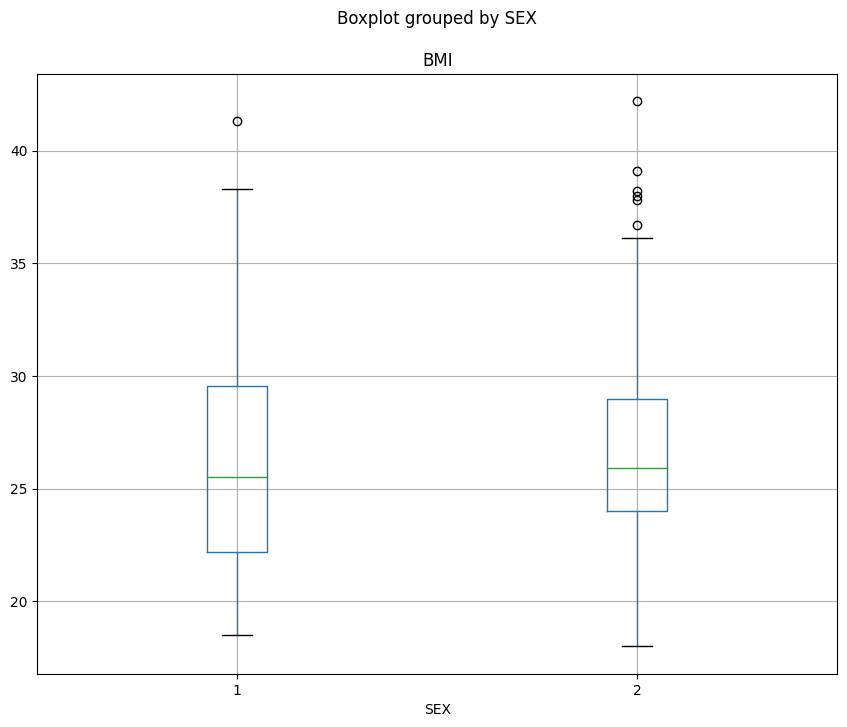

In [14]:
df.boxplot(column='BMI', by='SEX', figsize=(10,8))
plt.show()

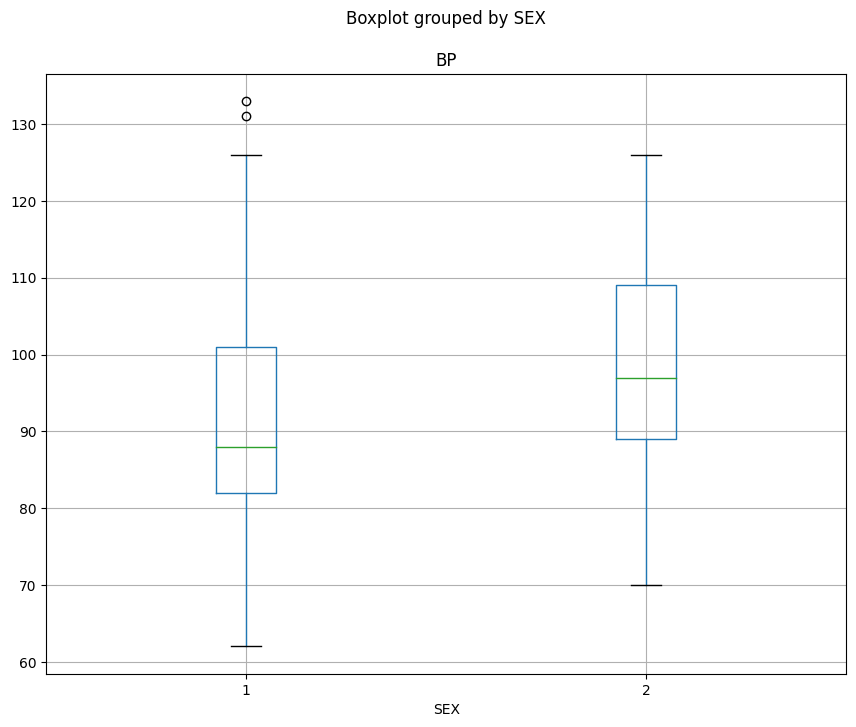

In [15]:
df.boxplot(column='BP', by='SEX', figsize=(10,8))
plt.show()

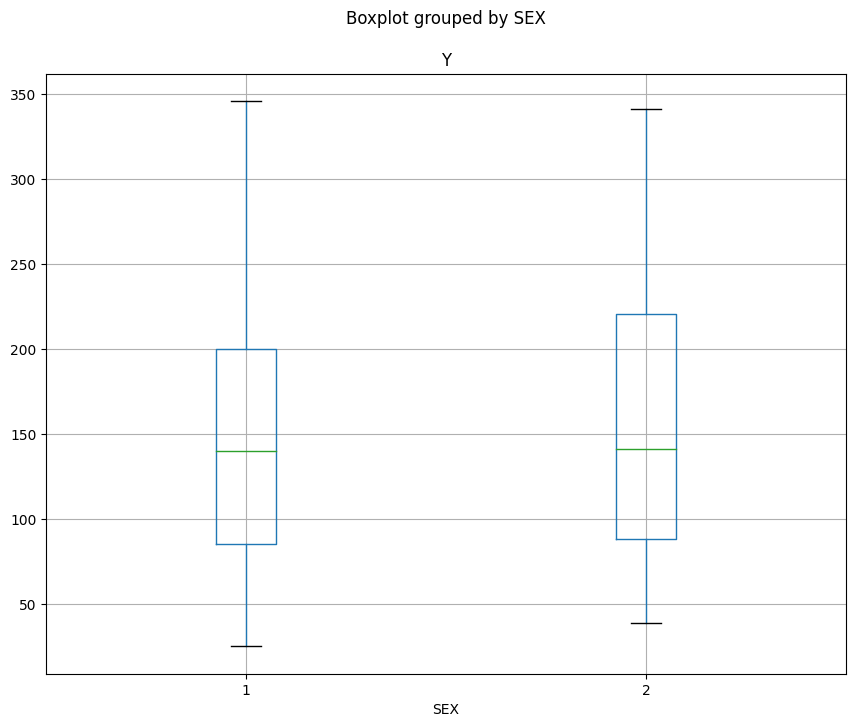

In [16]:
df.boxplot(column='Y', by='SEX', figsize=(10,8))
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

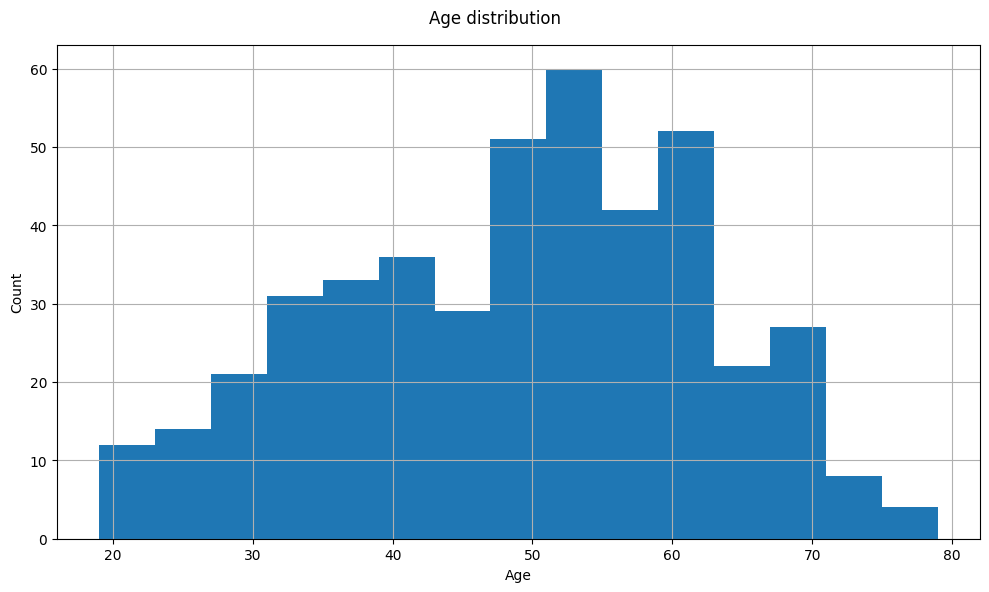

In [18]:
df['AGE'].hist(bins=15, figsize=(10,6))
plt.suptitle('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

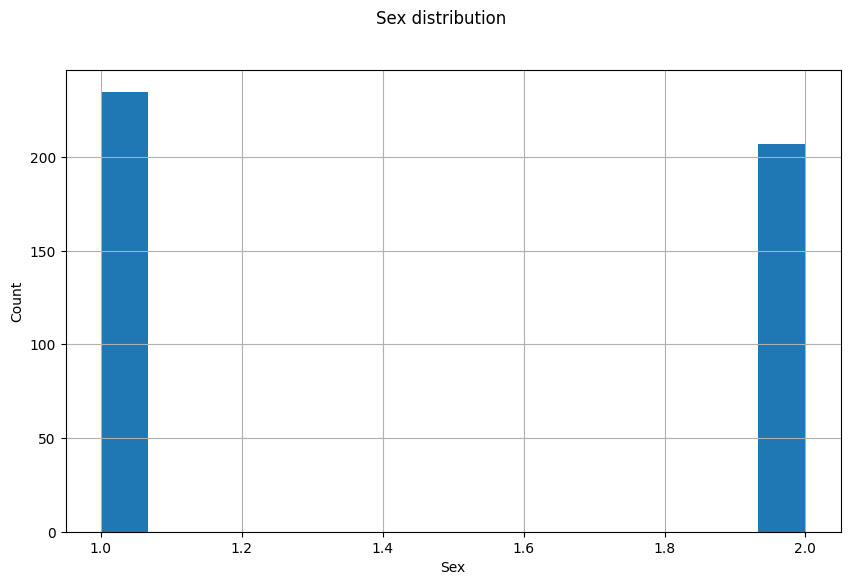

In [27]:
df['SEX'].hist(bins=15, figsize=(10,6))
plt.suptitle('Sex distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

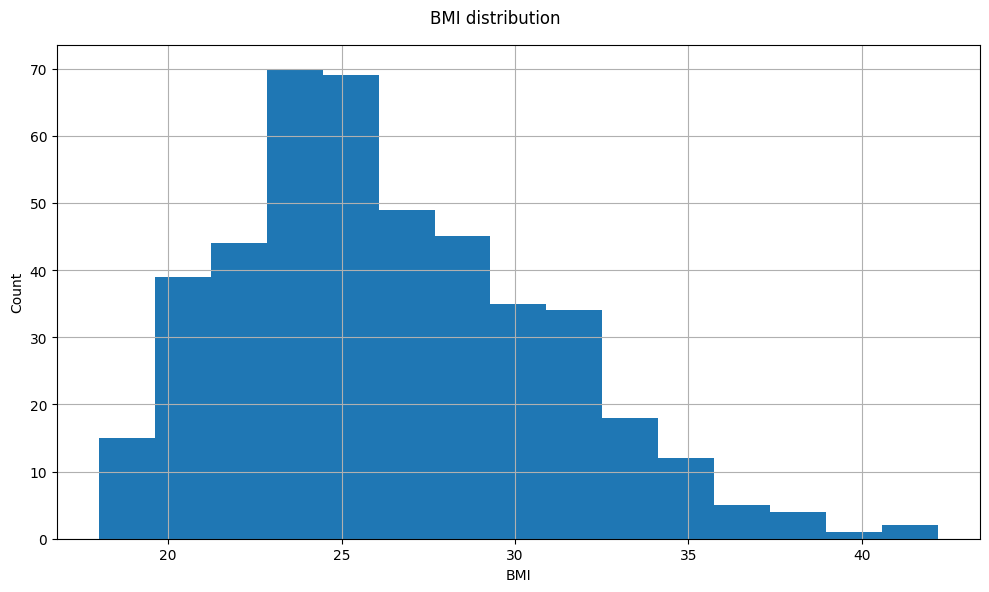

In [28]:
df['BMI'].hist(bins=15, figsize=(10,6))
plt.suptitle('BMI distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

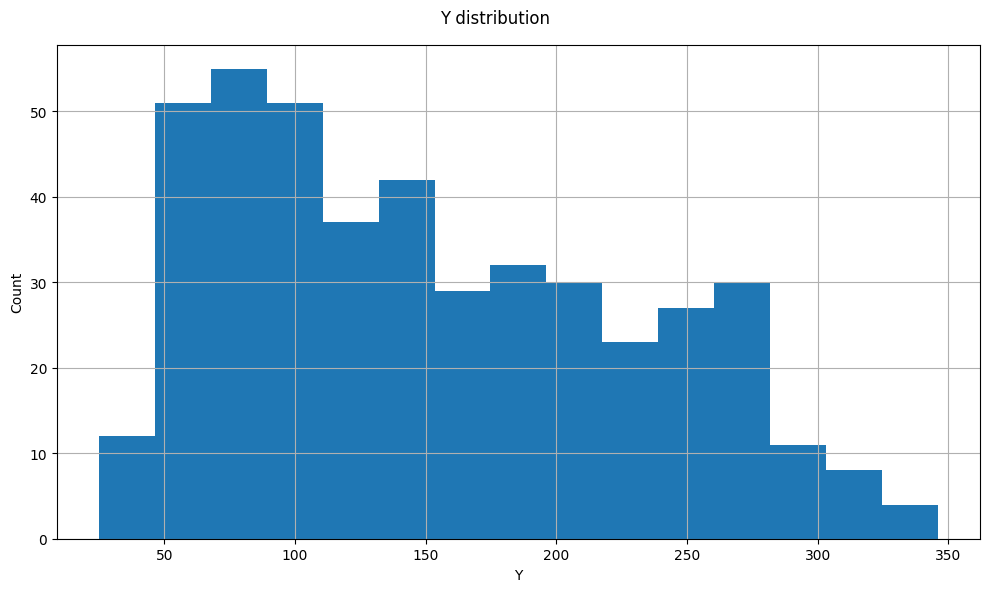

In [29]:
df['Y'].hist(bins=15, figsize=(10,6))
plt.suptitle('Y distribution')
plt.xlabel('Y')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [30]:
# AGE, SEX, BMI, BP, S1-S6
np.corrcoef(df['Y'],df['AGE'])

array([[1.        , 0.18788875],
       [0.18788875, 1.        ]])

In [31]:
np.corrcoef(df['Y'],df['SEX'])

array([[1.      , 0.043062],
       [0.043062, 1.      ]])

In [32]:
np.corrcoef(df['Y'],df['BMI'])

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [33]:
np.corrcoef(df['Y'],df['BP'])

array([[1.        , 0.44148176],
       [0.44148176, 1.        ]])

In [34]:
np.corrcoef(df['Y'],df['S1'])

array([[1.        , 0.21202248],
       [0.21202248, 1.        ]])

In [35]:
np.corrcoef(df['Y'],df['S2'])

array([[1.        , 0.17405359],
       [0.17405359, 1.        ]])

In [36]:
np.corrcoef(df['Y'],df['S3'])

array([[ 1.        , -0.39478925],
       [-0.39478925,  1.        ]])

In [37]:
np.corrcoef(df['Y'],df['S4'])

array([[1.        , 0.43045288],
       [0.43045288, 1.        ]])

In [38]:
np.corrcoef(df['Y'],df['S5'])

array([[1.        , 0.56588259],
       [0.56588259, 1.        ]])

In [39]:
np.corrcoef(df['Y'],df['S6'])

array([[1.        , 0.38248348],
       [0.38248348, 1.        ]])

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [56]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975


The P-value is low, but not low enough to suggest that there may be a correlation between gender and the progression of diabetes